<h1 align="center"> 
DATS 6202, Fall 2018, Exercise_4
</h1> 

<h4 align="center"> 
Yuxiao Huang ([yuxiaohuang@gwu.edu](mailto:yuxiaohuang@gwu.edu))
</h4>

## Note
- Complete the missing parts indicated by # Implement me.
-  We expect you to follow a reasonable programming style. While we do not mandate a specific style, we require that your code to be neat, clear, **documented/commented** and above all consistent.

# Overview
- Apply logistic regression, decision tree, and random forest on [Balloons dataset](https://archive.ics.uci.edu/ml/datasets/balloons)
- Evaluate the classification accuracy of the models

## Load data
1. Read the dataset [documentation](https://archive.ics.uci.edu/ml/datasets/balloons)
2. Load the [yellow-small+adult-stretch dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/yellow-small+adult-stretch.data) of Balloons data
2. Specify the name of the columns
3. Get the feature vector (X) and target vector (y)

In [36]:
import pandas as pd

In [37]:
# Load the yellow-small+adult-stretch dataset of Balloons data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/yellow-small+adult-stretch.data', header=None)

# Specify the name of the columns
df.columns = ['color', 'size', 'act', 'age', 'inflated']

# Show the header and the data
df

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T
5,YELLOW,LARGE,STRETCH,CHILD,F
6,YELLOW,LARGE,DIP,ADULT,F
7,YELLOW,LARGE,DIP,CHILD,F
8,PURPLE,SMALL,STRETCH,ADULT,T
9,PURPLE,SMALL,STRETCH,CHILD,F


In [38]:
# Specify the name of the target
target = 'inflated'

# Get the target vector
# Implement me
y = 

# Specify the name of the features
features = list(df.drop(target, axis=1).columns)

# Get the feature vector
# Implement me
X = 

## Preprocess data
1. Encode the features and target 
2. Randomly choose 30% of the data for testing
    - hint: set random_state=0 and stratify=y (in order to obtain the same result)

In [39]:
# Encode the features using one-hot-encoding
# Implement me
X = 

# Show the encoded features
X

,color_PURPLE,color_YELLOW,size_LARGE,size_SMALL,act_DIP,act_STRETCH,age_ADULT,age_CHILD
0,0,1,0,1,0,1,1,0
1,0,1,0,1,0,1,0,1
2,0,1,0,1,1,0,1,0
3,0,1,0,1,1,0,0,1
4,0,1,1,0,0,1,1,0
5,0,1,1,0,0,1,0,1
6,0,1,1,0,1,0,1,0
7,0,1,1,0,1,0,0,1
8,1,0,0,1,0,1,1,0
9,1,0,0,1,0,1,0,1


In [40]:
from sklearn.preprocessing import LabelEncoder

# Declare the LabelEncoder
class_le = LabelEncoder()

# Enclode the target
# Implement me
y = 

In [41]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set randome_state as 0 and stratify as y)
# Implement me
X_train, X_test, y_train, y_test = 

# Step 3:  train, test, and evaluate
1. Train and test logistic regression, decision tree, and random forest
    - for decision tree: plot the decision tree using graphviz
    - for random forest: plot the bar chart of feature importances (sorted in descending order)
    - hint: set random_state=0 for each classifier (in order to obtain the same result)
2. Evaluate the performance of the classifiers based on classification accuracy
    - plot the bar chart of accuracies (sorted in descending order)

In [47]:
from sklearn.metrics import precision_recall_fscore_support

def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the classifier
    :param classifier: a classifier             
    """
    
    # Declare the model
    # Implement me
    clf = 
    
    # Train the model
    # Implement me
    
    if classifier is DecisionTreeClassifier:
        global tree  
        # Get the tree
        # Implement me
        tree = 
    elif classifier is RandomForestClassifier:
        global importances
        # Get the feature importances
        # Implement me
        importances = 
    
    # Update the list of accuracies
    accuracies.append(clf.score(X_test, y_test))

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# The list of classifiers
clfs = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]

# The tree
tree = None

# The list of importances
importances = []

# The list of accuracies
accuracies = []

# For each classifer
for classifier in clfs:
    # Call function train_test_evaluate (defined above)
    # Implement me


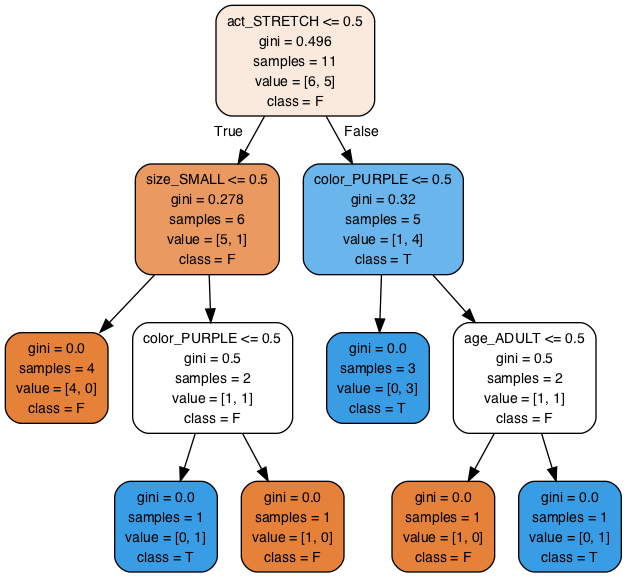

In [44]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['F', 
                                        'T'],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 

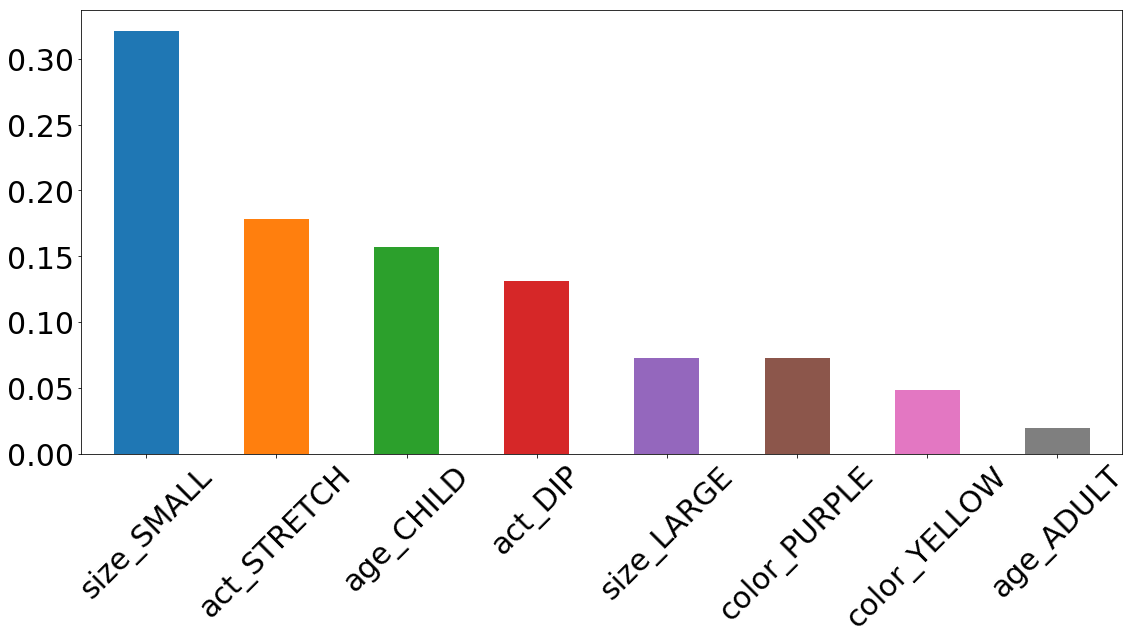

In [45]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

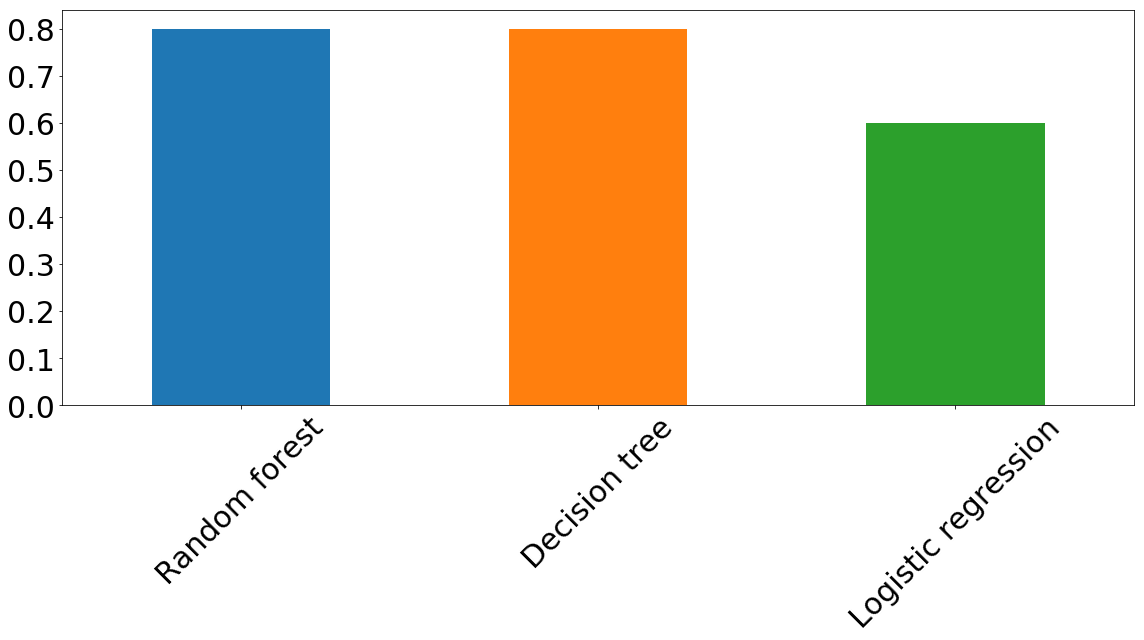

In [46]:
# Convert the accuracies into one-dimensional 1darray with corresponding classifier names as axis labels
clf_accuracies = pd.Series(accuracies, ['Logistic regression', 'Decision tree', 'Random forest'])

# Sort the array in descending order of the accuracies
clf_accuracies = clf_accuracies.sort_values(ascending=False)

# Draw the bar Plot from clf_accuracies 
clf_accuracies.plot(x='Classifiers', y='Fscores', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

## Discussion
1. What is the ground truth in the yellow-small+adult-stretch dataset?
2. Is the decision tree exactly the same as the ground truth?
3. What is the problem of feature importances provided by random forest?
4. Why logistic regression underperforms the other two models? 